# Correlation unemployment / GDP
We want to know if there is a correlation between the GDP per capita and the unemployment rate.

In [37]:
import os

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline  

BASE = os.path.join(os.pardir, "data")

In [57]:
# Open files

gdp = pd.read_pickle(os.path.join(BASE, "pickles", "GDP_DE_EL_EU.pkl"))
uep = pd.read_pickle(os.path.join(BASE, "pickles", "total_unemployment_rate.pkl"))

# Drop years outside of unemployment data
gdp.drop(range(2005, 2008), inplace=True)
gdp.head()

,DE,EL,EU28
,,,
2008,38432,30855,33065
2009,37501,30388,32277
2010,39703,28169,33347
2011,42541,26141,34747
2012,43359,25284,35297


In [58]:
# Keep only the countries we're interested in
countries = ["DE", "EL", "EU28"]
drop = [_ for _ in uep.columns 
        if _ not in countries]
uep.drop(columns=drop, inplace=True)
uep.head()

,DE,EL,EU28
2008,7.5,7.8,7.0
2009,7.8,9.6,8.9
2010,7.0,12.7,9.6
2011,5.8,17.9,9.6
2012,5.4,24.5,10.5


In [59]:
# Rename columns so there is no confusion
gdp.columns = [f"g_{x}" for x in gdp.columns]
uep.columns = [f"u_{x}" for x in uep.columns]

In [49]:
# Concatenate both tables into one
combi = pd.concat([uep, gdp], axis=1)

# Add a constant for our analysis
combi = sm.add_constant(combi)

combi.head()

,const,u_DE,u_EL,u_EU28,g_DE,g_EL,g_EU28
2008,1.0,7.5,7.8,7.0,38432,30855,33065
2009,1.0,7.8,9.6,8.9,37501,30388,32277
2010,1.0,7.0,12.7,9.6,39703,28169,33347
2011,1.0,5.8,17.9,9.6,42541,26141,34747
2012,1.0,5.4,24.5,10.5,43359,25284,35297


## Check correlation

In [65]:
for c in countries:
    print(f"+++++++++++++++++++{c}+++++++++++++++++++")
    y = combi[f"u_{c}"]
    X = combi[["const", f"g_{c}"]]
    model = sm.OLS(y, X).fit()
    print(model.summary(), end="\n\n")

+++++++++++++++++++DE+++++++++++++++++++
                            OLS Regression Results                            
Dep. Variable:                   u_DE   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     203.5
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           5.65e-08
Time:                        17:36:38   Log-Likelihood:                -3.4104
No. Observations:                  12   AIC:                             10.82
Df Residuals:                      10   BIC:                             11.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

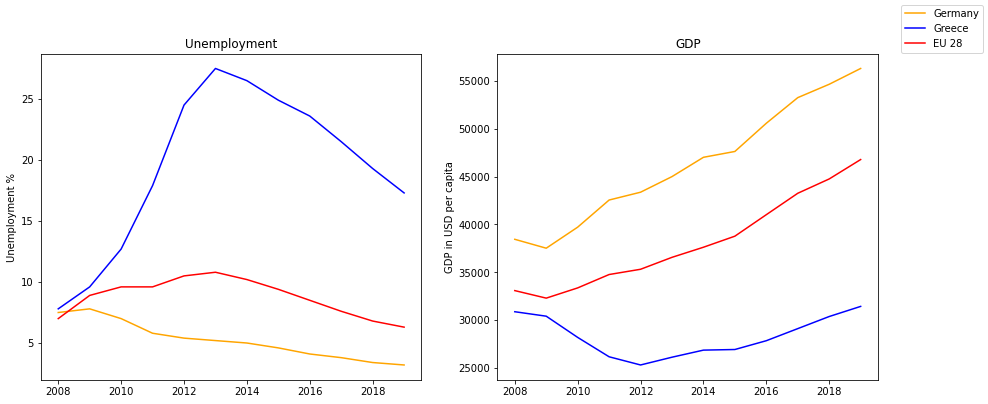

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

colors = ["orange", "blue", "red"]
names = {0: "Germany", 1: "Greece", 2: "EU 28"}

# Plot the graphs for every country
for i, c in enumerate(countries):
    ax[0].plot(f"u_{c}", data=combi, color=colors[i], label=names[i])
    ax[1].plot(f"g_{c}", data=combi, color=colors[i], label="")

# Set some labels
ax[0].set_ylabel("Unemployment %")
ax[1].set_ylabel("GDP in USD per capita")
ax[0].set_title("Unemployment")
ax[1].set_title("GDP")
fig.legend()

## Conclusions
The Pearson coefficient for Germany, Greece and the combined EU28 differ greatly (resp 0.948, 0.420, 0.288). Looking at the graph it can be easily seen that the unemployment in Germany is rougly inverse to the GDP. However, in the case of Greece the impact of the declining economy was far greater. Looking at the combined EU28, there is probably a dampening effect (between the northern and southern countries). The massive increase in unemployment was not halted by the already increasing GDP in northern Europe. 